The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


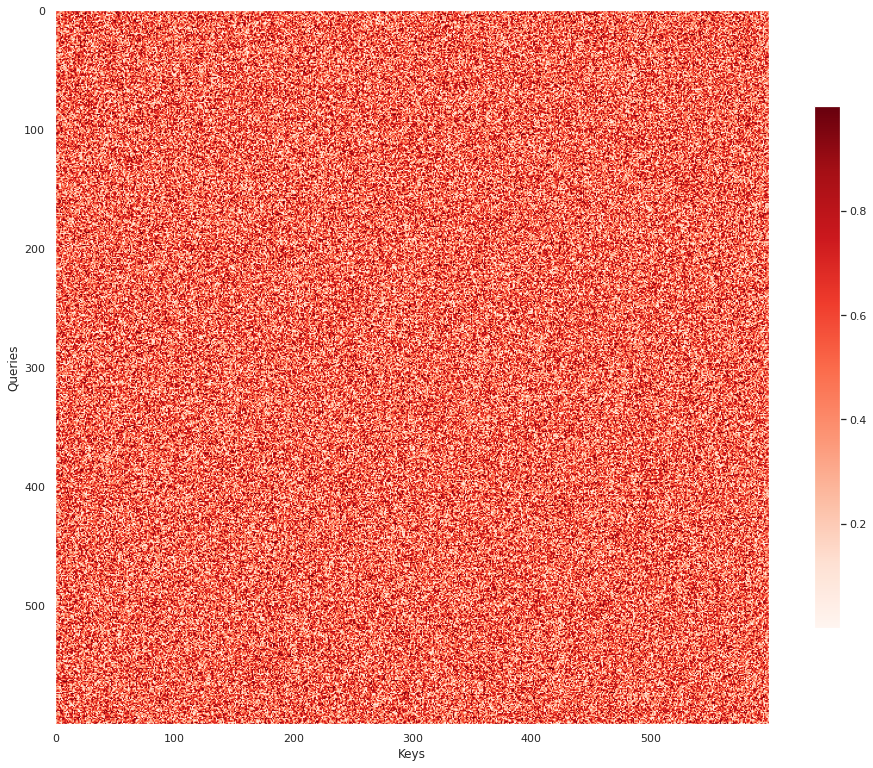

In [11]:
%load_ext autoreload
%autoreload 2
import tchx

tchx.set_notebook_plot()
%matplotlib inline

import torch as tch


attention_weights = tch.rand((600, 600)).reshape((1, 1, 600, 600))
tchx.show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


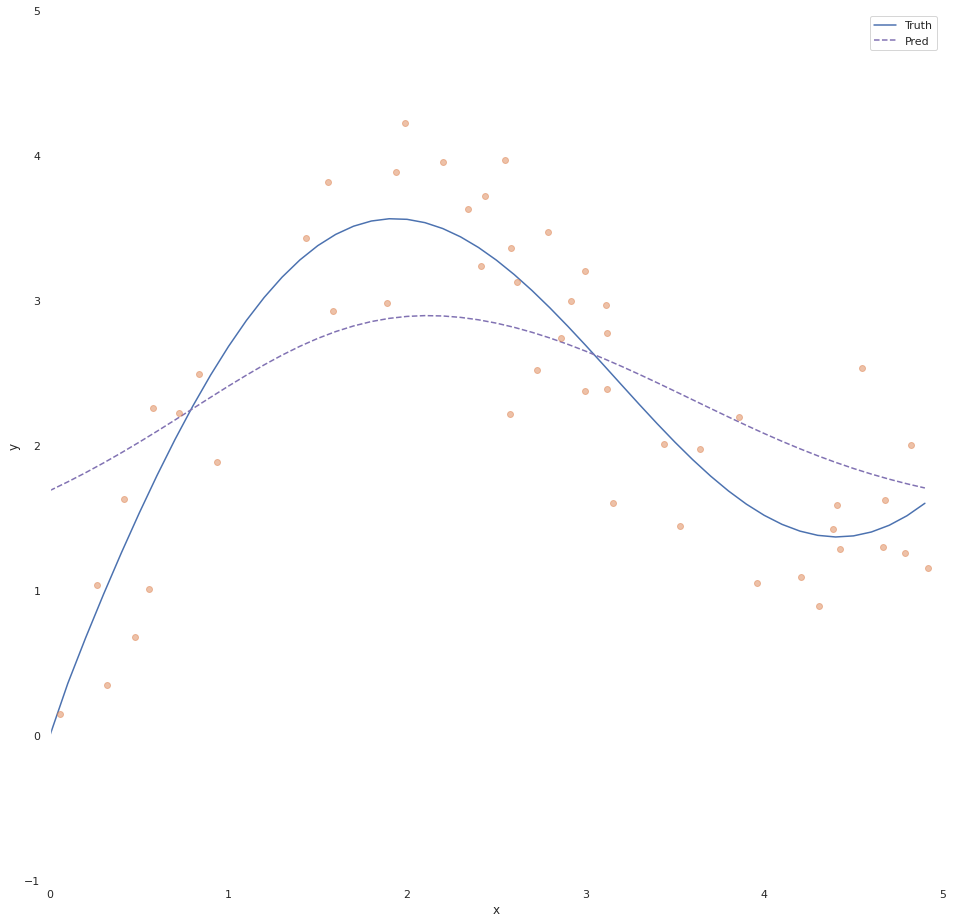

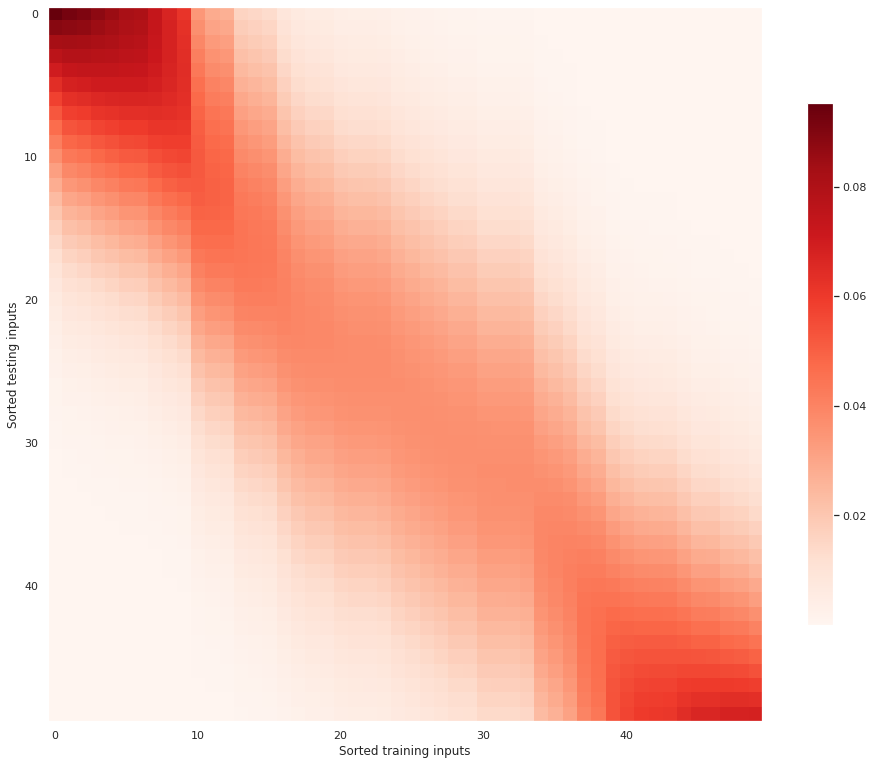

In [12]:
# Chapter 10
%load_ext autoreload
%autoreload 2
import tchx

tchx.set_notebook_plot()
%matplotlib inline

import torch as tch
import torch.nn.functional as functional


n_train = 50
x_train, _ = tch.sort(tch.rand(n_train) * 5) # noqa: despite the IDE's complains, tch.rand(n_train) * 5 is a torch.Tensor
def f(x):
    return 2 * tch.sin(x) + x ** 0.8

y_train = f(x_train) + tch.normal(0.0, 0.5, (n_train,))
x_test = tch.arange(0, 5, 0.1)
y_truth = f(x_test)
n_test = len(x_test)

def plot_kernel_reg(y_hat):
    fig, axes = tchx.plot(x_test, [y_truth, y_hat], 'x', 'y', legend=['Truth', 'Pred'],
              xlim=[0, 5], ylim=[-1, 5])
    axes.plot(x_train, y_train, 'o', alpha=0.5)

x_repeat = x_test.repeat_interleave(n_train).reshape((-1, n_train))
attention_weights = functional.softmax(-(x_repeat - x_train) ** 2 / 2, dim=1)
y_hat = tch.matmul(attention_weights, y_train)
plot_kernel_reg(y_hat)

tchx.show_heatmaps(attention_weights.unsqueeze(0).unsqueeze(0),
                   xlabel='Sorted training inputs', ylabel='Sorted testing inputs')

In [13]:
# Chapter 10
%load_ext autoreload
%autoreload 2
import tchx

tchx.set_notebook_plot()
%matplotlib inline

import torch as tch


weights = tch.ones((2, 10)) * 0.1
values = tch.arange(20.0).reshape((2, 10))
print(weights.unsqueeze(1).shape)
print(values.unsqueeze(-1).shape)
print(tch.bmm(weights.unsqueeze(1), values.unsqueeze(-1)).shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
torch.Size([2, 1, 10])
torch.Size([2, 10, 1])
torch.Size([2, 1, 1])


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
tensor([[[0.0661, 0.1836],
         [0.4505, 0.3641],
         [0.3709, 0.1406],
         [0.0589, 0.2768],
         [0.2601, 0.9625],
         [0.2266, 0.6220],
         [0.7835, 0.0582],
         [0.2779, 0.2614],
         [0.8223, 0.8284],
         [0.1682, 0.9559]],

        [[0.4975, 0.2646],
         [0.9698, 0.1919],
         [0.8607, 0.0531],
         [0.0876, 0.4809],
         [0.5849, 0.3805],
         [0.5510, 0.4817],
         [0.3862, 0.0787],
         [0.6293, 0.5290],
         [0.0971, 0.6477],
         [0.9700, 0.2636]]])


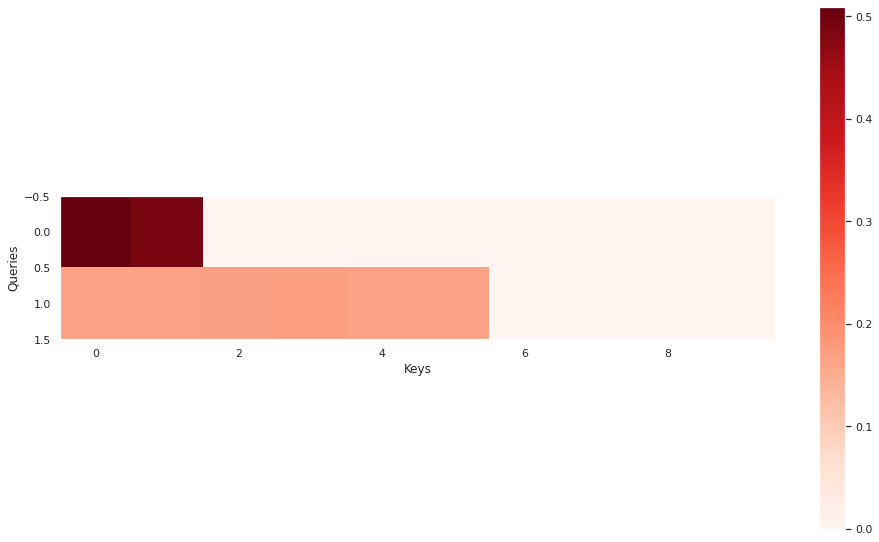

In [14]:
# Chapter 10
%load_ext autoreload
%autoreload 2
import tchx

tchx.set_notebook_plot()
%matplotlib inline

import torch as tch


queries, keys = tch.normal(0, 1, (2, 1, 20)), tch.rand((2, 10, 2))
values = tch.arange(40, dtype=tch.float32).reshape((1, 10, 4)).repeat((2, 1, 1))

valid_lens = tch.tensor([2, 6])
attention = tchx.AdditiveAttention(key_size=2, query_size=20, hidden_size=8, dropout=0.1)
attention.eval()
attention(queries, keys, values, valid_lens)

tchx.show_heatmaps(attention.attention_weights.reshape((1, 1, 2, -1)), xlabel='Keys', ylabel='Queries')

print(keys)

In [15]:
# Chapter 10
%load_ext autoreload
%autoreload 2
import tchx

tchx.set_notebook_plot()
%matplotlib inline

import torch as tch


train_iter, src_vocab, tgt_vocab = tchx.load_data_nmt(batch_size=2, num_steps=8)
X, X_valid_len, Y, Y_valid_len = next(iter(train_iter))

decoder = tchx.Seq2SeqDecoder(vocab_size=10, embed_size=8, hidden_size=16, num_layers=2)
decoder.eval()
print(next(decoder.parameters()))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Parameter containing:
tensor([[-1.1330,  0.2159,  1.1091,  0.5471,  1.0654,  0.1875,  0.2983,  2.7253],
        [-0.2936, -1.0520, -0.9140,  0.1413, -0.9800, -1.2999,  0.2702,  0.5845],
        [-0.0900,  0.8806,  0.2728,  1.1133, -0.3968, -0.1291, -0.0960,  1.4703],
        [ 1.0306,  0.5567,  0.6847, -1.3244,  0.0850,  1.1514,  0.6338, -1.4597],
        [-0.4196, -0.2057,  0.2353,  1.3782,  0.5804,  0.1317,  0.1121,  2.2434],
        [ 1.3286, -1.1651, -0.3789, -0.2169,  1.1241, -0.0826,  0.3889, -0.3322],
        [-0.8885,  1.1681, -1.0095, -1.1368, -1.2278, -0.2599,  0.4676,  0.5568],
        [-0.2353, -0.4864, -0.9653, -1.2635, -0.6913, -0.2681,  2.1870,  0.0286],
        [-0.5242,  0.6476,  0.5605, -1.0684,  0.8121,  0.7804,  2.4175,  0.7880],
        [ 0.4083, -0.4487, -2.6148, -0.8241, -0.3353,  1.1422, -0.7267,  0.5111]],
       requires_grad=True)
